In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [220]:
df = pd.read_csv("./Customer.csv")
df1 = pd.read_csv("./Transactions.csv")
df2 = pd.read_csv("./prod_cat_info.csv")
print(f"df = {df.columns} \n df1 = {df1.columns} \n df2 = {df2.columns}")

df = Index(['customer_Id', 'DOB', 'Gender', 'city_code'], dtype='object') 
 df1 = Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type'],
      dtype='object') 
 df2 = Index(['prod_cat_code', 'prod_cat', 'prod_sub_cat_code', 'prod_subcat'], dtype='object')


## 1. Merge the Dataset

In [221]:
customer_final = pd.merge(left=df,right=df1,left_on="customer_Id",right_on="cust_id",how="inner")
customer_final = pd.merge(left=customer_final,right=df2,left_on="prod_subcat_code",right_on="prod_sub_cat_code",how="inner")
customer_final

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,5,Books,7,Fiction
1,268408,02-01-1970,M,4.0,16197868036,268408,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store,1,Clothing,1,Women
2,268408,02-01-1970,M,4.0,16197868036,268408,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store,2,Footwear,1,Mens
3,268408,02-01-1970,M,4.0,16197868036,268408,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store,4,Bags,1,Mens
4,268408,02-01-1970,M,4.0,16197868036,268408,12/12/2013,1,4,5,210,110.250,1160.250,Flagship store,1,Clothing,1,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57161,274308,29-12-1992,F,5.0,57358822237,274308,5/9/2012,1,2,4,876,367.920,3871.920,e-Shop,1,Clothing,1,Women
57162,274308,29-12-1992,F,5.0,57358822237,274308,5/9/2012,1,2,4,876,367.920,3871.920,e-Shop,2,Footwear,1,Mens
57163,274308,29-12-1992,F,5.0,57358822237,274308,5/9/2012,1,2,4,876,367.920,3871.920,e-Shop,4,Bags,1,Mens
57164,274308,29-12-1992,F,5.0,58160544337,274308,4/7/2012,12,5,5,588,308.700,3248.700,e-Shop,5,Books,12,Academic


#### The above code performs an inner join on 'customer_Id' and 'cust_id', followed by another inner join on 'prod_subcat_code' and 'prod_sub_cat_code'. The resulting dataset, Customer_Final, contains information about customers, transactions, and product hierarchy.

## 2. Summary Report
### a. Get the column name and data type

In [222]:
customer_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57166 entries, 0 to 57165
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_Id        57166 non-null  int64  
 1   DOB                57166 non-null  object 
 2   Gender             57144 non-null  object 
 3   city_code          57151 non-null  float64
 4   transaction_id     57166 non-null  int64  
 5   cust_id            57166 non-null  int64  
 6   tran_date          57166 non-null  object 
 7   prod_subcat_code   57166 non-null  int64  
 8   prod_cat_code_x    57166 non-null  int64  
 9   Qty                57166 non-null  int64  
 10  Rate               57166 non-null  int64  
 11  Tax                57166 non-null  float64
 12  total_amt          57166 non-null  float64
 13  Store_type         57166 non-null  object 
 14  prod_cat_code_y    57166 non-null  int64  
 15  prod_cat           57166 non-null  object 
 16  prod_sub_cat_code  571

### b. Top/Bottom 10 Observation

In [223]:
customer_final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,5,Books,7,Fiction
1,268408,02-01-1970,M,4.0,16197868036,268408,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store,1,Clothing,1,Women
2,268408,02-01-1970,M,4.0,16197868036,268408,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store,2,Footwear,1,Mens
3,268408,02-01-1970,M,4.0,16197868036,268408,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store,4,Bags,1,Mens
4,268408,02-01-1970,M,4.0,16197868036,268408,12/12/2013,1,4,5,210,110.250,1160.250,Flagship store,1,Clothing,1,Women
5,268408,02-01-1970,M,4.0,16197868036,268408,12/12/2013,1,4,5,210,110.250,1160.250,Flagship store,2,Footwear,1,Mens
6,268408,02-01-1970,M,4.0,16197868036,268408,12/12/2013,1,4,5,210,110.250,1160.250,Flagship store,4,Bags,1,Mens
7,268408,02-01-1970,M,4.0,28810141075,268408,2/9/2013,10,6,2,813,170.730,1796.730,TeleShop,3,Electronics,10,Audio and video
8,268408,02-01-1970,M,4.0,28810141075,268408,2/9/2013,10,6,2,813,170.730,1796.730,TeleShop,5,Books,10,Non-Fiction
9,268408,02-01-1970,M,4.0,28810141075,268408,2/9/2013,10,6,2,813,170.730,1796.730,TeleShop,6,Home and kitchen,10,Kitchen


In [224]:
customer_final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_sub_cat_code,prod_subcat
57156,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.57,3573.57,MBR,2,Footwear,3,Women
57157,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.57,3573.57,MBR,5,Books,3,Comics
57158,274308,29-12-1992,F,5.0,26208690928,274308,22-10-2012,1,2,2,898,188.58,1984.58,MBR,1,Clothing,1,Women
57159,274308,29-12-1992,F,5.0,26208690928,274308,22-10-2012,1,2,2,898,188.58,1984.58,MBR,2,Footwear,1,Mens
57160,274308,29-12-1992,F,5.0,26208690928,274308,22-10-2012,1,2,2,898,188.58,1984.58,MBR,4,Bags,1,Mens
57161,274308,29-12-1992,F,5.0,57358822237,274308,5/9/2012,1,2,4,876,367.92,3871.92,e-Shop,1,Clothing,1,Women
57162,274308,29-12-1992,F,5.0,57358822237,274308,5/9/2012,1,2,4,876,367.92,3871.92,e-Shop,2,Footwear,1,Mens
57163,274308,29-12-1992,F,5.0,57358822237,274308,5/9/2012,1,2,4,876,367.92,3871.92,e-Shop,4,Bags,1,Mens
57164,274308,29-12-1992,F,5.0,58160544337,274308,4/7/2012,12,5,5,588,308.70,3248.70,e-Shop,5,Books,12,Academic
57165,274308,29-12-1992,F,5.0,58160544337,274308,4/7/2012,12,5,5,588,308.70,3248.70,e-Shop,6,Home and kitchen,12,Tools


### c. Five Number Summary

In [225]:
customer_final.describe().loc[["min","max","25%","50%","75%","mean"],]

,customer_Id,city_code,transaction_id,cust_id,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,prod_cat_code_y,prod_sub_cat_code
min,266783.000000,1.000000,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,1.000000,1.000000
max,275265.000000,10.000000,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,6.000000,12.000000
25%,268931.000000,3.000000,2.527880e+10,268931.000000,3.000000,2.000000,1.000000,312.000000,98.490000,764.660000,2.000000,3.000000
50%,270982.000000,5.000000,5.019132e+10,270982.000000,4.000000,3.000000,3.000000,709.000000,199.342500,1759.160000,3.000000,4.000000
75%,273096.000000,8.000000,7.551116e+10,273096.000000,10.000000,5.000000,4.000000,1109.000000,364.980000,3553.680000,5.000000,10.000000
mean,271015.375101,5.496457,5.017556e+10,271015.375101,5.613949,3.462425,2.429766,635.022653,248.967409,2102.084532,3.446314,5.613949


#### The 'Qty', 'Rate', and 'Tax' columns have negative values, potentially indicating returns or discounts. The 'Rate' column has a wide range, from -1499 to 1500.

### d. Frequency table for all category

#### Before finding the frequency of all categorical data first convert the DOB and tran_date to datetime

In [226]:
customer_final["DOB"] = pd.to_datetime(customer_final["DOB"],format="mixed")
customer_final["tran_date"] = pd.to_datetime(customer_final["tran_date"],format="mixed")

In [227]:
customer_final.select_dtypes(object).columns

Index(['Gender', 'Store_type', 'prod_cat', 'prod_subcat'], dtype='object')

#### d.1 Gender

In [228]:
customer_final["Gender"].value_counts()

Gender
M    29191
F    27953
Name: count, dtype: int64

#### d.2 Store_type

In [229]:
customer_final["Store_type"].value_counts()

Store_type
e-Shop            23087
MBR               11644
Flagship store    11324
TeleShop          11111
Name: count, dtype: int64

#### d.3 Prod_cat

In [230]:
customer_final["prod_cat"].value_counts()

prod_cat
Books               12179
Clothing            10019
Footwear            10019
Electronics          9910
Home and kitchen     8087
Bags                 6952
Name: count, dtype: int64

#### d.4 Prod_subcat

In [231]:
customer_final["prod_subcat"].value_counts()

prod_subcat
Women                  10019
Mens                    9902
Kids                    7069
Mobiles                 4002
Comics                  3067
Audio and video         2993
Non-Fiction             2993
Kitchen                 2993
Children                2058
Bath                    2058
Academic                2029
Tools                   2029
Fiction                 1043
Furnishing              1007
DIY                      989
Cameras                  985
Personal Appliances      972
Computers                958
Name: count, dtype: int64

## 3. Histograms for all continuous variables and frequency bars for categorical variables.

### 3.1. Histogram for continuous variable

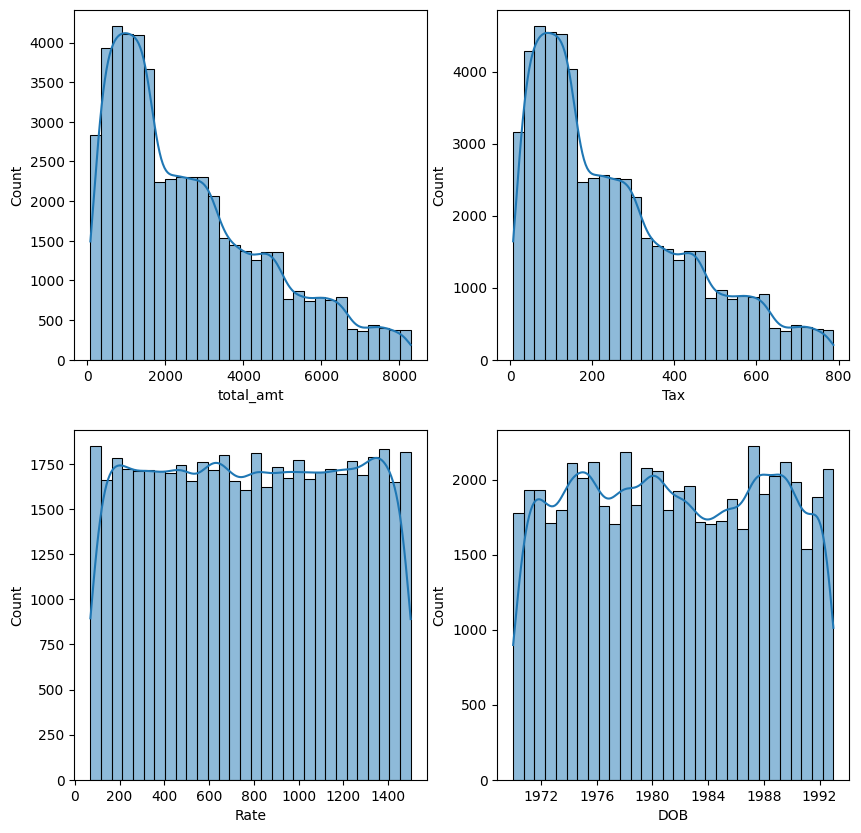

In [232]:
# 1. total_amt
ttl_amt = customer_final[customer_final["total_amt"]>0]["total_amt"]
ttl_tax = customer_final[customer_final["Tax"]>0]["Tax"]
ttl_rate = customer_final[customer_final["Rate"]>0]["Rate"]
ttl_dob = customer_final["DOB"]

fig,ax =plt.subplots(nrows=2,ncols=2,figsize=(10,10))
sns.histplot(ax=ax[0,0],data=ttl_amt,kde=True,bins=30)
sns.histplot(ax=ax[0,1],data=ttl_tax,kde=True,bins=30)
sns.histplot(ax=ax[1,0],data=ttl_rate,kde=True,bins=30)
sns.histplot(ax=ax[1,1],data=ttl_dob,kde=True,bins=30)
plt.show()

### 3.2. Frequency bar for categorical

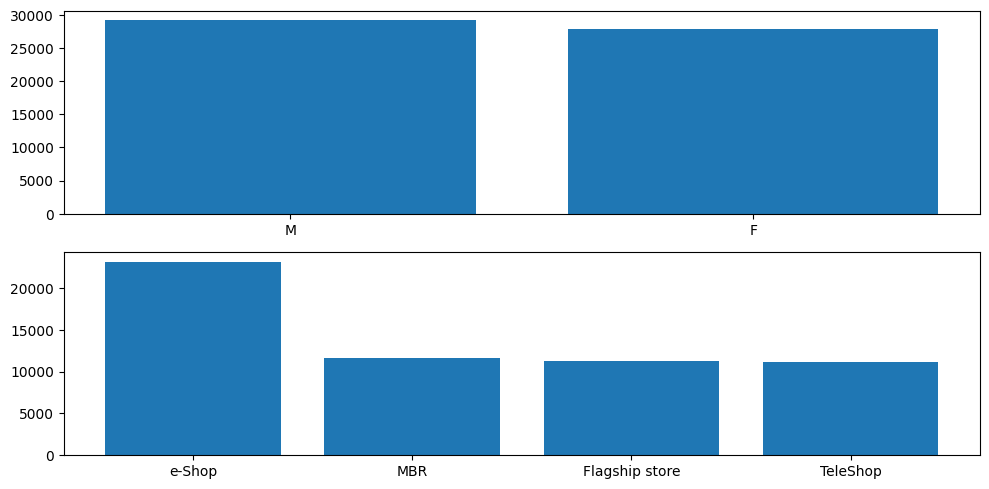

In [233]:
fig,ax = plt.subplots(ncols=1,nrows=2,figsize=(10,5))

a1 = customer_final["Gender"].value_counts().index
a2 = customer_final["Gender"].value_counts()
ax[0].bar(x=a1,height=a2)

b1 = customer_final["Store_type"].value_counts().index
b2 = customer_final["Store_type"].value_counts()
ax[1].bar(x=b1,height=b2)

plt.tight_layout()
plt.show()

## 4. Using customer_final merged datasest let's find out the
### 4.1. Time period of the available transcation data 

In [234]:
start_date = customer_final['tran_date'].dt.date.min()
end_date = customer_final['tran_date'].dt.date.max()

print(f"   Start Date: {start_date}")
print(f"   End Date: {end_date}")
print(f"   Time Period: {end_date - start_date}")

   Start Date: 2011-01-02
   End Date: 2014-12-02
   Time Period: 1430 days, 0:00:00


### 4.2. Count of Transactions with Negative Total Amount

In [235]:
count_negative_transactions = customer_final[customer_final["total_amt"]<0]["total_amt"].count()

print(f"   Total Count: {count_negative_transactions}")

   Total Count: 5430


## 5. Analyze which product categories are more popular among females vs male customers.

Gender               F     M
prod_cat                    
Bags              3363  3586
Books             6004  6169
Clothing          4916  5099
Electronics       4795  5113
Footwear          4916  5099
Home and kitchen  3959  4125


<Figure size 1500x500 with 0 Axes>

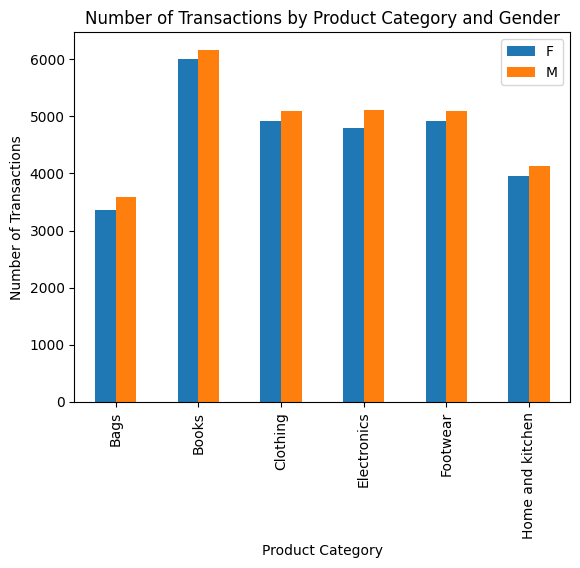

In [236]:
# Create the pivot table
gender_product = pd.pivot_table(customer_final, values='transaction_id', index='prod_cat', columns='Gender', aggfunc='count', fill_value=0)
# Get the unique values in the prod_cat column
categories = customer_final["prod_cat"].unique()

# Plot the bars
plt.figure(figsize=(15,5))
gender_product.plot(kind="bar")

# Add labels and title
plt.xlabel('Product Category')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by Product Category and Gender')
plt.legend()

# Show the plot
plt.show()

## 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [237]:
city_customer = customer_final.groupby("city_code").agg({"customer_Id":"count"}).sort_values(ascending=False,by="customer_Id")
city_customer

,customer_Id
city_code,
4.0,5961
5.0,5941
3.0,5886
10.0,5800
8.0,5771
7.0,5761
2.0,5616
1.0,5582
9.0,5538


### The city with city_code 4 has the maximum population

## 7. Which store type sells the maximum products by value and by quantity?

In [238]:
customer_final.columns

Index(['customer_Id', 'DOB', 'Gender', 'city_code', 'transaction_id',
       'cust_id', 'tran_date', 'prod_subcat_code', 'prod_cat_code_x', 'Qty',
       'Rate', 'Tax', 'total_amt', 'Store_type', 'prod_cat_code_y', 'prod_cat',
       'prod_sub_cat_code', 'prod_subcat'],
      dtype='object')

In [239]:
store_type = customer_final.groupby(["Store_type"]).agg({"Qty":sum,"total_amt":sum})
store_type

C:\Users\anura\AppData\Local\Temp\ipykernel_24672\2941288669.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  store_type = customer_final.groupby(["Store_type"]).agg({"Qty":sum,"total_amt":sum})
C:\Users\anura\AppData\Local\Temp\ipykernel_24672\2941288669.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  store_type = customer_final.groupby(["Store_type"]).agg({"Qty":sum,"total_amt":sum})


,Qty,total_amt
Store_type,,
Flagship store,27600,24072659.26
MBR,27869,24018167.29
TeleShop,27059,22980349.08
e-Shop,56372,49096588.71


### The e-shop strore type sold the maximum product with 56372 in quantity and 49096588.71 in amount.

## 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [240]:
flagship_amt = customer_final.groupby(["Store_type","prod_cat"]).agg({"total_amt":sum}).reset_index()
flagship_amt.loc[(flagship_amt["Store_type"]=="Flagship store") & ((flagship_amt["prod_cat"]=="Electronics") | (flagship_amt["prod_cat"]=="Clothing")),:]

C:\Users\anura\AppData\Local\Temp\ipykernel_24672\3561632892.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  flagship_amt = customer_final.groupby(["Store_type","prod_cat"]).agg({"total_amt":sum}).reset_index()


,Store_type,prod_cat,total_amt
2,Flagship store,Clothing,4177586.205
3,Flagship store,Electronics,4349256.795


## 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [241]:
ele_m = customer_final.loc[(customer_final["prod_cat"]=="Electronics") & (customer_final["Gender"]=="M"),:]
print(f"The amount earned from male through electronic purchase: {ele_m["total_amt"].sum()}")

The amount earned from male through electronic purchase: 10947130.024999999


## 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [242]:
# Step 1: Remove transactions with negative amounts
pst_tran = customer_final[customer_final["total_amt"]>0]

# Step 2: Find customers with more than 10 unique transactions
unq_c = pst_tran.groupby("customer_Id")["transaction_id"].nunique()

# Print the result
print("Number of customers with more than 10 unique transactions:", len(unq_c))

Number of customers with more than 10 unique transactions: 5506


## 11. For all customers aged between 25 - 35, find out:

###     a. What was the total amount spent for “Electronics” and “Books” product categories?

In [243]:
import datetime as dte
customer_final["AGE"] = (dte.datetime.now().year - customer_final["DOB"].dt.year)
customer_final

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_sub_cat_code,prod_subcat,AGE
0,268408,1970-02-01,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,5,Books,7,Fiction,54
1,268408,1970-02-01,M,4.0,16197868036,268408,2013-12-16,1,4,-5,-210,110.250,-1160.250,Flagship store,1,Clothing,1,Women,54
2,268408,1970-02-01,M,4.0,16197868036,268408,2013-12-16,1,4,-5,-210,110.250,-1160.250,Flagship store,2,Footwear,1,Mens,54
3,268408,1970-02-01,M,4.0,16197868036,268408,2013-12-16,1,4,-5,-210,110.250,-1160.250,Flagship store,4,Bags,1,Mens,54
4,268408,1970-02-01,M,4.0,16197868036,268408,2013-12-12,1,4,5,210,110.250,1160.250,Flagship store,1,Clothing,1,Women,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57161,274308,1992-12-29,F,5.0,57358822237,274308,2012-05-09,1,2,4,876,367.920,3871.920,e-Shop,1,Clothing,1,Women,32
57162,274308,1992-12-29,F,5.0,57358822237,274308,2012-05-09,1,2,4,876,367.920,3871.920,e-Shop,2,Footwear,1,Mens,32
57163,274308,1992-12-29,F,5.0,57358822237,274308,2012-05-09,1,2,4,876,367.920,3871.920,e-Shop,4,Bags,1,Mens,32
57164,274308,1992-12-29,F,5.0,58160544337,274308,2012-04-07,12,5,5,588,308.700,3248.700,e-Shop,5,Books,12,Academic,32


In [256]:
filter_data = customer_final[(customer_final["AGE"] >= 25) & (customer_final["AGE"] <= 35)]
tota_amt = filter_data.loc[(filter_data["prod_cat"]=="Electronics") | (filter_data["prod_cat"]=="Book"),:]
print(f"The total amount spent for “Electronics” and “Books” product categories: {tota_amt["total_amt"].sum()}")

The total amount spent for “Electronics” and “Books” product categories: 3623002.175


### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [260]:
filter_data = customer_final[(customer_final["tran_date"]>="2014-01-01") & (customer_final["tran_date"] <= "2014-03-01")]
print(f"The total amount spent by customer between 1st Jan 2014 to 1st March 2014: {filter_data["total_amt"].sum()}")

The total amount spent by customer between 1st Jan 2014 to 1st March 2014: 3466411.52
